# **Dataset Transformation**

## _ETL Workflow Notebook 3_

## Content:
1. Removing trailing or leading white spaces or characters (trim) from string variables, and modifying the variable type;
2. Capitalizing or lowering case of string variables (string homogenizing);
3. Adding contractions to the contractions library;
4. Correcting contracted strings;
5. Substituting (replacing) substrings on string variables;
6. Inverting the order of the string characters;
7. Slicing the strings;
8. Getting the leftest characters from the strings (retrieve last characters);
9. Getting the rightest characters from the strings (retrieve first characters);
10. Joining strings from a same column into a single string;
11. Joining several string columns into a single string column;
12. Splitting strings into a list of strings;
13. Substituting (replacing or switching) whole strings by different text values (on string variables);
14. Replacing strings with Machine Learning: finding similar strings and replacing them by standard strings;
15. Searching for Regular Expression (RegEx) within a string column;
16. Replacing a Regular Expression (RegEx) from a string column;
17. Applying Fast Fourier Transform;
18. Generating columns with frequency information;
19. Transforming the dataset and reverse transforms: log-transform;
20. Exponential transform;
21. Box-Cox transform;
22. Square-root transform;
23. Cube-root transform;
24. General power transform;
25. One-Hot Encoding;
26. Ordinal Encoding;
27. Feature scaling;
28. Importing or exporting models and dictionaries.

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

## **Load Python Libraries in Global Context**

In [1]:
import load
from idsw import *

/content/idsw/datafetch/core.py:1713: SyntaxWarning: invalid escape sequence '\p'
  engine = create_engine(r"sqlite:///C:\path\to\foo.db")
/content/idsw/datafetch/pipes.py:317: SyntaxWarning: invalid escape sequence '\s'
  txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
/content/idsw/datafetch/pipes.py:1271: SyntaxWarning: invalid escape sequence '\('
  To find a spec like "TensorSpec(shape=(None, *, *)" the Regex would be: r"TensorSpec\(shape=\(None, (\d+), (\d+)\)"
/content/idsw/modelling/core.py:2751: SyntaxWarning: invalid escape sequence '\{'
  * Given a training set $\{x^{(1)}, ..., x^{(m)}\}$ you want to estimate the Gaussian distribution for each
/content/idsw/modelling/core.py:2846: SyntaxWarning: invalid escape sequence '\{'
  $\{(x_{\rm cv}^{(1)}, y_{\rm cv}^{(1)}),\ldots, (x_{\rm cv}^{(m_{\rm cv})}, y_{\rm cv}^{(m_{\rm cv})})\}$,


Package copied to the working directory.
To import its whole content, run:

    from idsw import *



/content/idsw/modelling/deep.py:239: SyntaxWarning: invalid escape sequence '\%'
  print("In this example, we added Dropout(0.5). It means that you lose 50\% of nodes. If using Dropout(0.2), you would lose 20\% of nodes.")
/content/idsw/modelling/deep.py:445: SyntaxWarning: invalid escape sequence '\%'
  print("In this example, we added Dropout(0.5). It means that you lose 50\% of nodes. If using Dropout(0.2), you would lose 20\% of nodes.")
/content/idsw/etl/core.py:2462: SyntaxWarning: invalid escape sequence '\d'
  r'st\d\s\w{3,10}'
/content/idsw/etl/core.py:2583: SyntaxWarning: invalid escape sequence '\d'
  - re.findall(r"\d+-\d+", text) - returns: ['4-3', '10-04']
/content/idsw/etl/core.py:2632: SyntaxWarning: invalid escape sequence '\s'
  - If we do re.findall(r"the\s\d+s", my_string) - returns: ['the 80s', 'the 90s']
/content/idsw/etl/core.py:2720: SyntaxWarning: invalid escape sequence '\d'
  - Example: re.match(r"\d+", "12345bcada") - returns: <_sre.SRE_Match object; span=(0

## **Call the functions**

### **Importing the dataset**

In [2]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt),
## JSON, txt, or CSV (comma separated values) files. Tables in webpages or html files can also be read.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "dataset.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or,
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.
# Also, html files and webpages may be also read.

# You may input the path for an HTML file containing a table to be read; or
# a string containing the address for a webpage containing the table. The address must start
# with www or htpp. If a website is input, the full address can be input as FILE_DIRECTORY_PATH
# or as FILE_NAME_WITH_EXTENSION.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True
# if you want to read a file with txt extension containing a text formatted as JSON
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’,
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’,
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}


HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = ","
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " "
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.

SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep.
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Dataset extracted from dataset.csv. Check the 10 first rows of this dataframe:



,timestamp,Season,Repetition,Cultivar,PH,IFP,NLP,NGL,NS,MHG,GY
0,2022-12-01,1,1,NEO 760 CE,58.8,15.2,98.2,1.81,5.2,152.20,3232.82
1,2022-12-01,1,1,MANU IPRO,81.2,18.0,98.8,1.75,7.4,145.59,3230.99
2,2022-12-01,1,1,77HO111I2X - GUAPORÉ,52.2,14.4,64.8,2.30,7.2,180.25,3640.46
3,2022-12-01,1,1,NK 7777 IPRO,54.0,15.4,82.2,2.67,8.2,188.27,4122.76
4,2022-12-01,1,1,GNS7900 IPRO - AMPLA,55.2,19.8,49.0,1.64,3.6,161.01,3433.34
5,2022-12-01,1,1,LTT 7901 IPRO,60.6,15.8,61.4,2.22,6.0,164.13,3430.72
6,2022-12-01,1,1,BRASMAX BÔNUS IPRO,71.2,19.4,73.0,2.05,6.4,177.23,3506.11
7,2022-12-01,1,1,97Y97 IPRO,53.8,14.0,49.0,2.66,5.2,167.34,2947.93
8,2022-12-01,1,1,BRASMAX OLIMPO IPRO,86.6,23.0,44.0,2.00,4.8,187.87,4368.41
9,2022-12-01,1,1,LYNDA IPRO,55.8,13.6,44.4,1.99,2.8,196.27,3716.41


### **Removing trailing or leading white spaces or characters (trim) from string variables, and modifying the variable type**

In [4]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'Cultivar'
# COLUMN_TO_ANALYZE: string (inside quotes),
# containing the name of the column that will be analyzed.
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

NEW_VARIABLE_TYPE = None
# NEW_VARIABLE_TYPE = None. String (in quotes) that represents a given data type for the column
# after transformation. Set:
# - NEW_VARIABLE_TYPE = 'int' to convert the column to integer type after the transform;
# - NEW_VARIABLE_TYPE = 'float' to convert the column to float (decimal number);
# - NEW_VARIABLE_TYPE = 'datetime' to convert it to date or timestamp;
# - NEW_VARIABLE_TYPE = 'category' to convert it to Pandas categorical variable.

METHOD = 'trim'
# METHOD = 'trim' will eliminate trailing and leading white spaces from the strings in
# COLUMN_TO_ANALYZE.
# METHOD = 'substring' will eliminate a defined trailing and leading substring from
# COLUMN_TO_ANALYZE.

SUBSTRING_TO_ELIMINATE = None
# SUBSTRING_TO_ELIMINATE = None. Set as a string (in quotes) if METHOD = 'substring'.
# e.g. suppose COLUMN_TO_ANALYZE contains time information: each string ends in " min":
# "1 min", "2 min", "3 min", etc. If SUBSTRING_TO_ELIMINATE = " min", this portion will be
# eliminated, resulting in: "1", "2", "3", etc. If NEW_VARIABLE_TYPE = None, these values will
# continue to be strings. By setting NEW_VARIABLE_TYPE = 'int' or 'float', the series will be
# converted to a numeric type.

CREATE_NEW_COLUMN = True
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_trim'
# NEW_COLUMN_SUFFIX = "_trim"
# This value has effect only if CREATE_NEW_COLUMN = True.
# The new column name will be set as column + NEW_COLUMN_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_trim", the new column will be named as
# "column1_trim".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.


# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = trim_spaces_or_characters (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, new_variable_type = NEW_VARIABLE_TYPE, method = METHOD, substring_to_eliminate = SUBSTRING_TO_ELIMINATE, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

Finished removing leading and trailing spaces or characters (substrings).
Check the 10 first elements from the series:



,Cultivar
0,NEO 760 CE
1,MANU IPRO
2,77HO111I2X - GUAPORÉ
3,NK 7777 IPRO
4,GNS7900 IPRO - AMPLA
5,LTT 7901 IPRO
6,BRASMAX BÔNUS IPRO
7,97Y97 IPRO
8,BRASMAX OLIMPO IPRO
9,LYNDA IPRO


### **Capitalizing or lowering case of string variables (string homogenizing)**

In [6]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'Cultivar'
# COLUMN_TO_ANALYZE: string (inside quotes),
# containing the name of the column that will be analyzed.
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

METHOD = 'capitalize'
# METHOD = 'capitalize' will capitalize all letters from the input string
# (turn them to upper case).
# METHOD = 'lowercase' will make the opposite: turn all letters to lower case.
# e.g. suppose COLUMN_TO_ANALYZE contains strings such as 'String One', 'STRING 2',  and
# 'string3'. If METHOD = 'capitalize', the output will contain the strings:
# 'STRING ONE', 'STRING 2', 'STRING3'. If METHOD = 'lowercase', the outputs will be:
# 'string one', 'string 2', 'string3'.

CREATE_NEW_COLUMN = True
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_homogenized'
# NEW_COLUMN_SUFFIX = "_homogenized"
# This value has effect only if CREATE_NEW_COLUMN = True.
# The new column name will be set as column + NEW_COLUMN_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_homogenized", the new column will be named as
# "column1_homogenized".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.


# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = capitalize_or_lower_string_case (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, method = METHOD, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

Capitalizing the string (moving all characters to upper case).

Finished homogenizing the string case of Cultivar, giving value consistency.
Check the 10 first elements from the series:



,Cultivar
0,NEO 760 CE
1,MANU IPRO
2,77HO111I2X - GUAPORÉ
3,NK 7777 IPRO
4,GNS7900 IPRO - AMPLA
5,LTT 7901 IPRO
6,BRASMAX BÔNUS IPRO
7,97Y97 IPRO
8,BRASMAX OLIMPO IPRO
9,LYNDA IPRO


In [7]:
dataset.columns

Index(['timestamp', 'Season', 'Repetition', 'Cultivar', 'PH', 'IFP', 'NLP',
       'NGL', 'NS', 'MHG', 'GY', 'Cultivar_trim', 'Cultivar_homogenized'],
      dtype='object')

### **Applying Fast Fourier Transform**
- Determine which frequencies are important by extracting features with <a href="https://en.wikipedia.org/wiki/Fast_Fourier_transform" class="external">Fast Fourier Transform</a>.

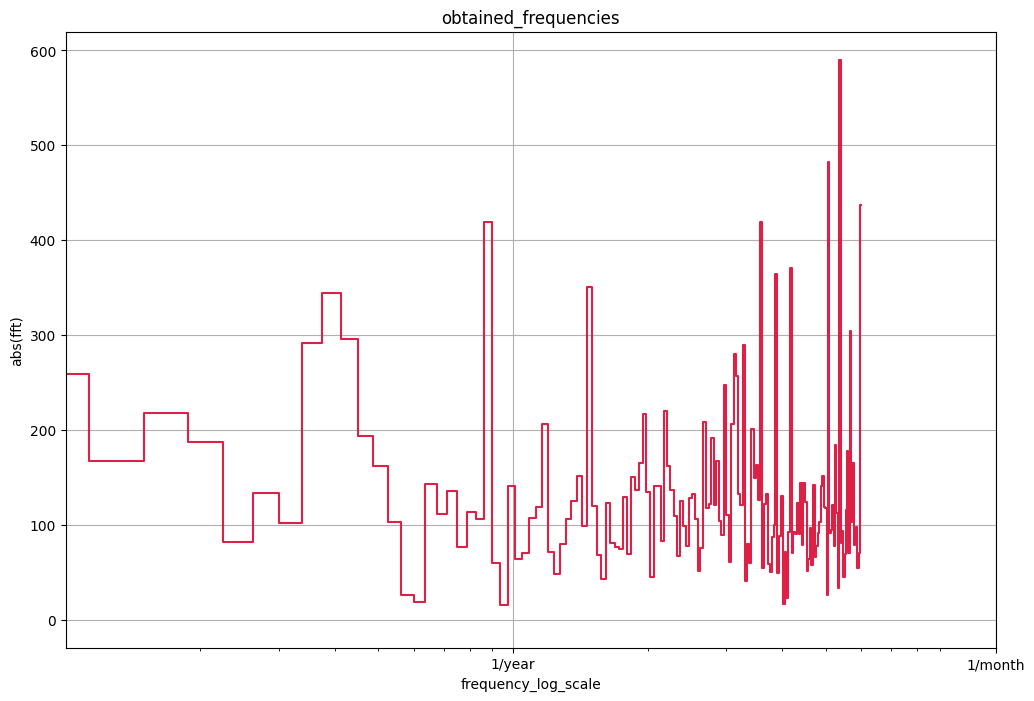



The returned frequencies are always in counts per year: 1 count per year corresponds to 1 year; 12 counts: months per year; 365.2524 counts: days per year, etc.
            
        Plot starts in 0 counts per year; goes from 0.1 to 1 per year (log scale); and grows to 365.2524 = 1 count per day; to the limit defined.
                        
        Thus, to when reading the results, one can simply pick the frequency and use as given, considering that the unit is (year)**-1.
            
        Instead, the following rules can be applied:

        - 1/year = 1 count per year

        - 365.2524/year = 365.2524 counts per year = 1/day = 1 count per day

        - (8766.0576)/year = (24 * 365.2524) counts per year = 24 counts/day = 1/h = 1 count per hour.

        - (525963.4560)/year = (60 * 24 * 365.2524) counts per year = 60*24 counts/day = 60 counts/hour = 1/min = 1 count per minute.

        - (31557807.3600)/year = (60 * 60 * 24 * 365.2524) counts per year = ... =  1/min = 60 c

,freq_in_counts_per_year,abs_fft
0,0.0000,0.000015
1,0.0375,88.352669
2,0.0750,214.062088
3,0.1125,258.481995
4,0.1500,167.420029
...,...,...
156,5.8500,95.534012
157,5.8875,97.222626
158,5.9250,54.396252
159,5.9625,70.478409


In [8]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'PH'
# COLUMN_TO_ANALYZE: string (inside quotes),
# containing the name of the column that will be analyzed.
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'm'
# AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'hour' or 'h' for hours; 'day' or 'd' for days;
# 'minute' or 'min' for minutes; 'seconds' or 's' for seconds; 'ms' for milliseconds; 'ns' for
# nanoseconds; 'year' or 'y' for years; 'month' or 'm' for months.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'capability_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# The results of the Fast Fourier Transform will be stored in the object named fft.
# fft_with_freq_df is a dataframe containing the absolute ffts
# with the correspondent frequencies in counts per year.
# Simply modify this object on the left of equality:
fft, fft_with_freq_df = fast_fourier_transform (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, average_frequency_of_data_collection = AVERAGE_FREQUENCY_OF_DATA_COLLECTION, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

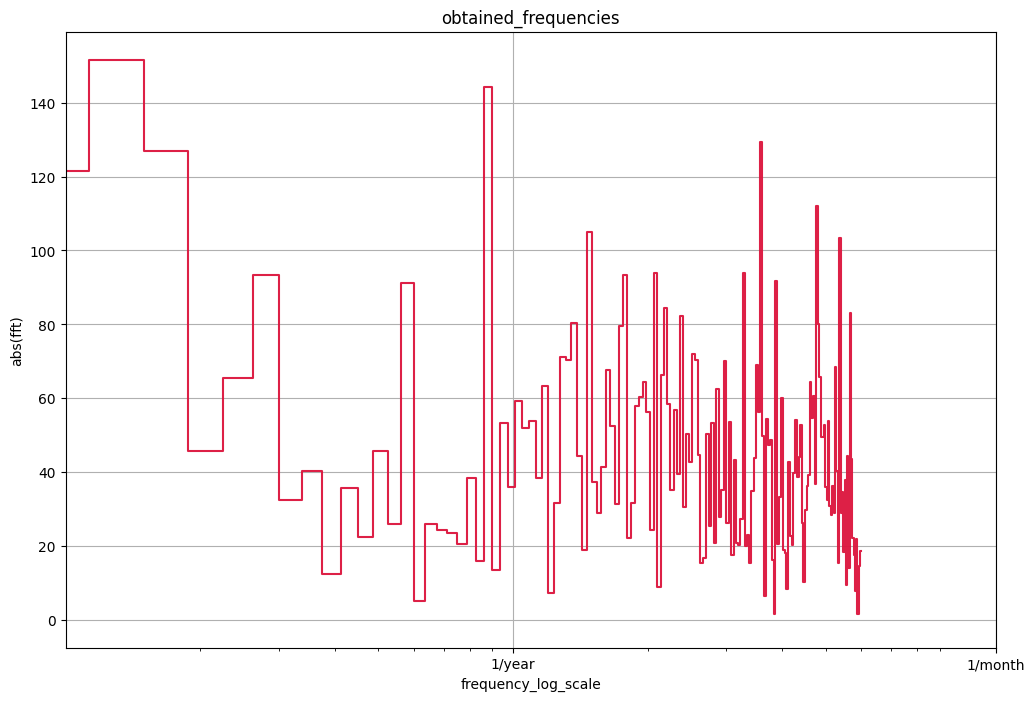



The returned frequencies are always in counts per year: 1 count per year corresponds to 1 year; 12 counts: months per year; 365.2524 counts: days per year, etc.
            
        Plot starts in 0 counts per year; goes from 0.1 to 1 per year (log scale); and grows to 365.2524 = 1 count per day; to the limit defined.
                        
        Thus, to when reading the results, one can simply pick the frequency and use as given, considering that the unit is (year)**-1.
            
        Instead, the following rules can be applied:

        - 1/year = 1 count per year

        - 365.2524/year = 365.2524 counts per year = 1/day = 1 count per day

        - (8766.0576)/year = (24 * 365.2524) counts per year = 24 counts/day = 1/h = 1 count per hour.

        - (525963.4560)/year = (60 * 24 * 365.2524) counts per year = 60*24 counts/day = 60 counts/hour = 1/min = 1 count per minute.

        - (31557807.3600)/year = (60 * 60 * 24 * 365.2524) counts per year = ... =  1/min = 60 c

,freq_in_counts_per_year,abs_fft
0,0.0000,0.000005
1,0.0375,55.217201
2,0.0750,124.745476
3,0.1125,121.621559
4,0.1500,151.697556
...,...,...
156,5.8500,7.851501
157,5.8875,21.823282
158,5.9250,1.420338
159,5.9625,14.424698


In [9]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'IFP'
# COLUMN_TO_ANALYZE: string (inside quotes),
# containing the name of the column that will be analyzed.
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'm'
# AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'hour' or 'h' for hours; 'day' or 'd' for days;
# 'minute' or 'min' for minutes; 'seconds' or 's' for seconds; 'ms' for milliseconds; 'ns' for
# nanoseconds; 'year' or 'y' for years; 'month' or 'm' for months.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'capability_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# The results of the Fast Fourier Transform will be stored in the object named fft.
# fft_with_freq_df is a dataframe containing the absolute ffts
# with the correspondent frequencies in counts per year.
# Simply modify this object on the left of equality:
fft, fft_with_freq_df = fast_fourier_transform (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, average_frequency_of_data_collection = AVERAGE_FREQUENCY_OF_DATA_COLLECTION, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

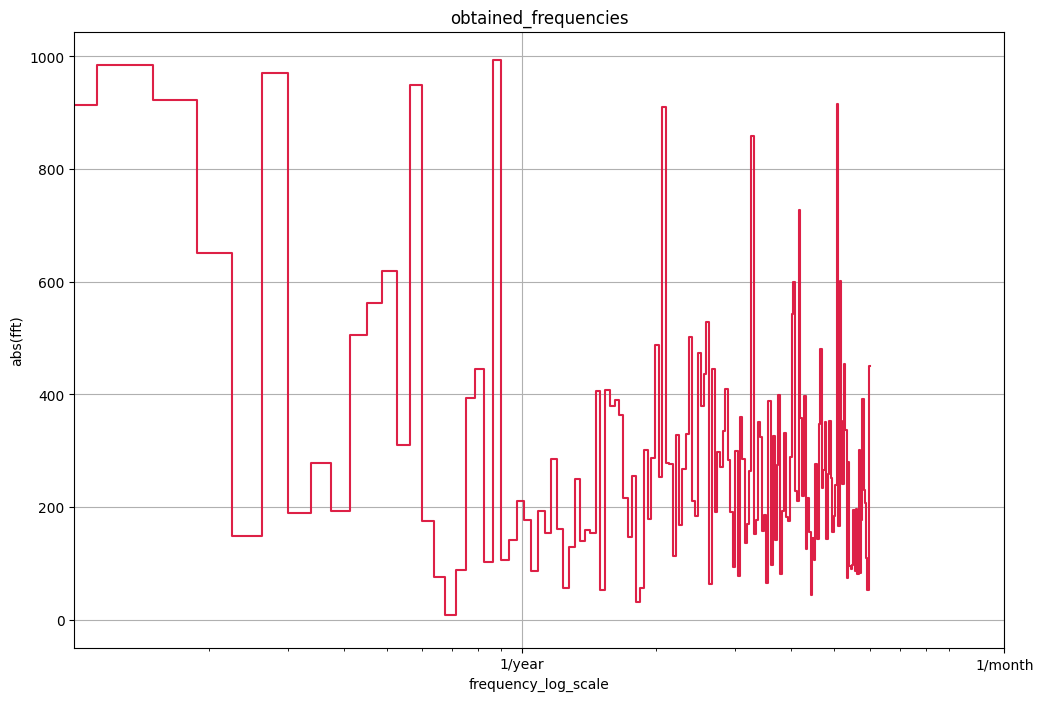



The returned frequencies are always in counts per year: 1 count per year corresponds to 1 year; 12 counts: months per year; 365.2524 counts: days per year, etc.
            
        Plot starts in 0 counts per year; goes from 0.1 to 1 per year (log scale); and grows to 365.2524 = 1 count per day; to the limit defined.
                        
        Thus, to when reading the results, one can simply pick the frequency and use as given, considering that the unit is (year)**-1.
            
        Instead, the following rules can be applied:

        - 1/year = 1 count per year

        - 365.2524/year = 365.2524 counts per year = 1/day = 1 count per day

        - (8766.0576)/year = (24 * 365.2524) counts per year = 24 counts/day = 1/h = 1 count per hour.

        - (525963.4560)/year = (60 * 24 * 365.2524) counts per year = 60*24 counts/day = 60 counts/hour = 1/min = 1 count per minute.

        - (31557807.3600)/year = (60 * 60 * 24 * 365.2524) counts per year = ... =  1/min = 60 c

,freq_in_counts_per_year,abs_fft
0,0.0000,0.000031
1,0.0375,47.193398
2,0.0750,569.484680
3,0.1125,913.857483
4,0.1500,983.993958
...,...,...
156,5.8500,229.715790
157,5.8875,206.650665
158,5.9250,109.223877
159,5.9625,53.028275


In [12]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'NLP'
# 'PH', 'IFP', 'NLP', 'NGL', 'NS', 'MHG', 'GY'
# COLUMN_TO_ANALYZE: string (inside quotes),
# containing the name of the column that will be analyzed.
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'm'
# AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'hour' or 'h' for hours; 'day' or 'd' for days;
# 'minute' or 'min' for minutes; 'seconds' or 's' for seconds; 'ms' for milliseconds; 'ns' for
# nanoseconds; 'year' or 'y' for years; 'month' or 'm' for months.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'capability_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# The results of the Fast Fourier Transform will be stored in the object named fft.
# fft_with_freq_df is a dataframe containing the absolute ffts
# with the correspondent frequencies in counts per year.
# Simply modify this object on the left of equality:
fft, fft_with_freq_df = fast_fourier_transform (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, average_frequency_of_data_collection = AVERAGE_FREQUENCY_OF_DATA_COLLECTION, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

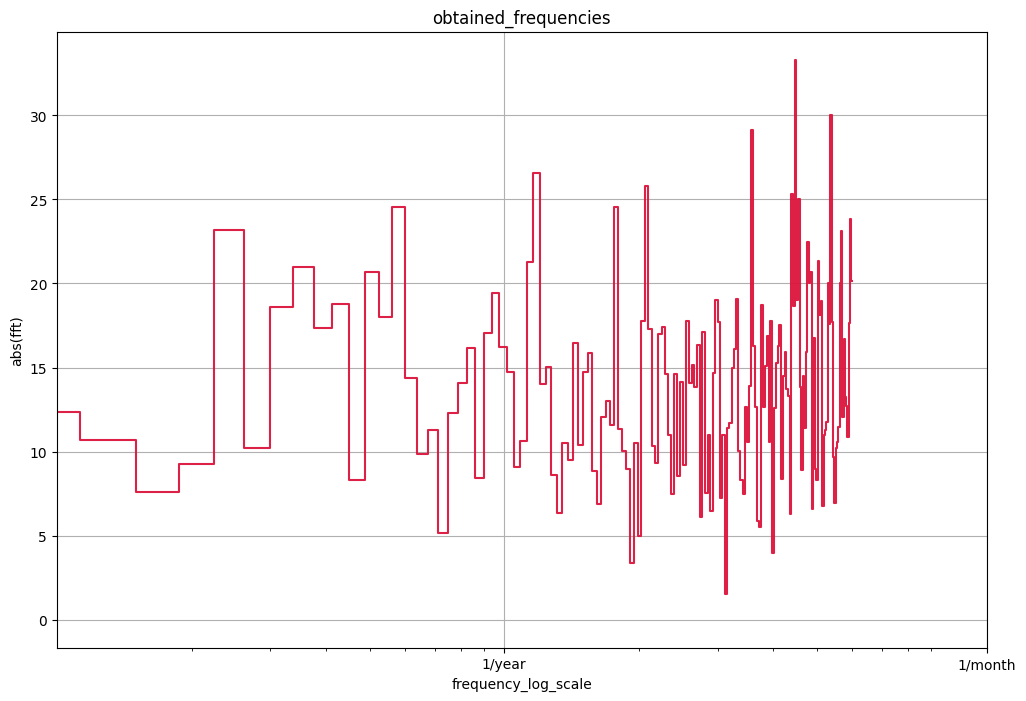



The returned frequencies are always in counts per year: 1 count per year corresponds to 1 year; 12 counts: months per year; 365.2524 counts: days per year, etc.
            
        Plot starts in 0 counts per year; goes from 0.1 to 1 per year (log scale); and grows to 365.2524 = 1 count per day; to the limit defined.
                        
        Thus, to when reading the results, one can simply pick the frequency and use as given, considering that the unit is (year)**-1.
            
        Instead, the following rules can be applied:

        - 1/year = 1 count per year

        - 365.2524/year = 365.2524 counts per year = 1/day = 1 count per day

        - (8766.0576)/year = (24 * 365.2524) counts per year = 24 counts/day = 1/h = 1 count per hour.

        - (525963.4560)/year = (60 * 24 * 365.2524) counts per year = 60*24 counts/day = 60 counts/hour = 1/min = 1 count per minute.

        - (31557807.3600)/year = (60 * 60 * 24 * 365.2524) counts per year = ... =  1/min = 60 c

,freq_in_counts_per_year,abs_fft
0,0.0000,0.000002
1,0.0375,3.536348
2,0.0750,15.136782
3,0.1125,12.328441
4,0.1500,10.663242
...,...,...
156,5.8500,12.717334
157,5.8875,10.854368
158,5.9250,17.629881
159,5.9625,23.822613


In [13]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'NGL'
# 'PH', 'IFP', 'NLP', 'NGL', 'NS', 'MHG', 'GY'
# COLUMN_TO_ANALYZE: string (inside quotes),
# containing the name of the column that will be analyzed.
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'm'
# AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'hour' or 'h' for hours; 'day' or 'd' for days;
# 'minute' or 'min' for minutes; 'seconds' or 's' for seconds; 'ms' for milliseconds; 'ns' for
# nanoseconds; 'year' or 'y' for years; 'month' or 'm' for months.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'capability_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# The results of the Fast Fourier Transform will be stored in the object named fft.
# fft_with_freq_df is a dataframe containing the absolute ffts
# with the correspondent frequencies in counts per year.
# Simply modify this object on the left of equality:
fft, fft_with_freq_df = fast_fourier_transform (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, average_frequency_of_data_collection = AVERAGE_FREQUENCY_OF_DATA_COLLECTION, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

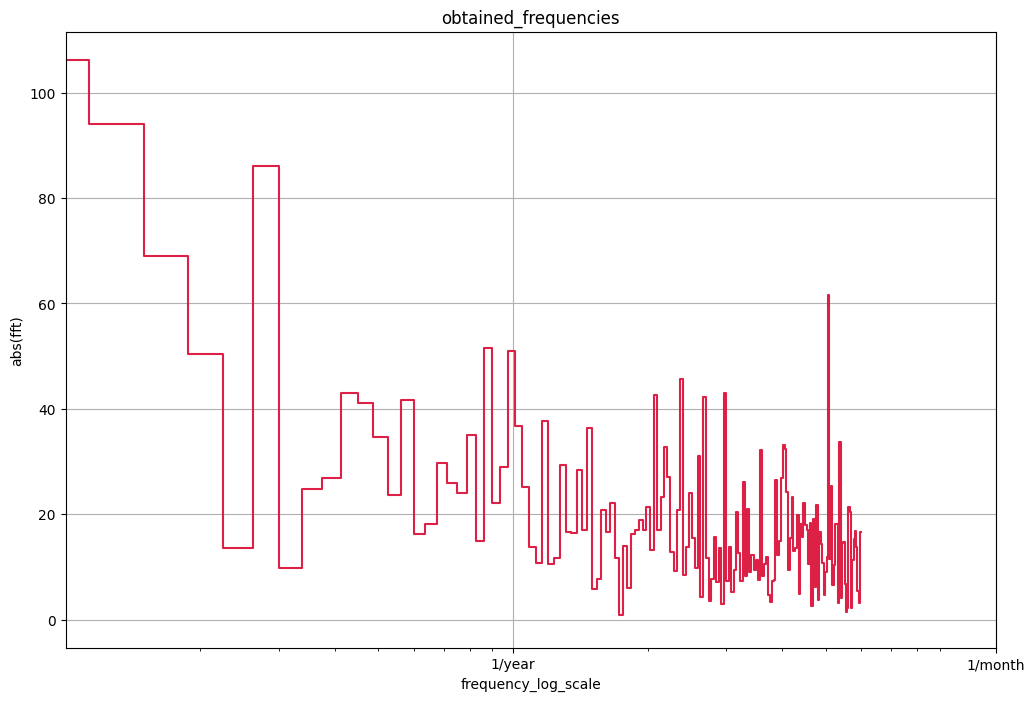



The returned frequencies are always in counts per year: 1 count per year corresponds to 1 year; 12 counts: months per year; 365.2524 counts: days per year, etc.
            
        Plot starts in 0 counts per year; goes from 0.1 to 1 per year (log scale); and grows to 365.2524 = 1 count per day; to the limit defined.
                        
        Thus, to when reading the results, one can simply pick the frequency and use as given, considering that the unit is (year)**-1.
            
        Instead, the following rules can be applied:

        - 1/year = 1 count per year

        - 365.2524/year = 365.2524 counts per year = 1/day = 1 count per day

        - (8766.0576)/year = (24 * 365.2524) counts per year = 24 counts/day = 1/h = 1 count per hour.

        - (525963.4560)/year = (60 * 24 * 365.2524) counts per year = 60*24 counts/day = 60 counts/hour = 1/min = 1 count per minute.

        - (31557807.3600)/year = (60 * 60 * 24 * 365.2524) counts per year = ... =  1/min = 60 c

,freq_in_counts_per_year,abs_fft
0,0.0000,0.000000
1,0.0375,46.002460
2,0.0750,81.298203
3,0.1125,106.254395
4,0.1500,93.990059
...,...,...
156,5.8500,16.839794
157,5.8875,13.827142
158,5.9250,5.495320
159,5.9625,3.127728


In [14]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'NS'
# 'PH', 'IFP', 'NLP', 'NGL', 'NS', 'MHG', 'GY'
# COLUMN_TO_ANALYZE: string (inside quotes),
# containing the name of the column that will be analyzed.
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'm'
# AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'hour' or 'h' for hours; 'day' or 'd' for days;
# 'minute' or 'min' for minutes; 'seconds' or 's' for seconds; 'ms' for milliseconds; 'ns' for
# nanoseconds; 'year' or 'y' for years; 'month' or 'm' for months.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'capability_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# The results of the Fast Fourier Transform will be stored in the object named fft.
# fft_with_freq_df is a dataframe containing the absolute ffts
# with the correspondent frequencies in counts per year.
# Simply modify this object on the left of equality:
fft, fft_with_freq_df = fast_fourier_transform (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, average_frequency_of_data_collection = AVERAGE_FREQUENCY_OF_DATA_COLLECTION, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

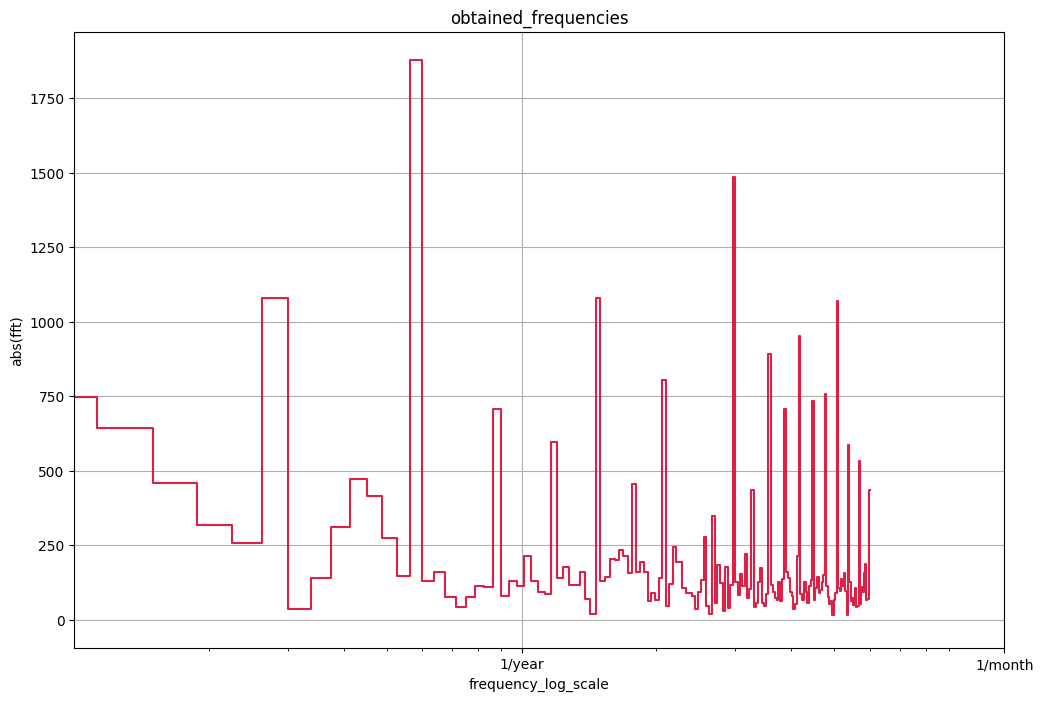



The returned frequencies are always in counts per year: 1 count per year corresponds to 1 year; 12 counts: months per year; 365.2524 counts: days per year, etc.
            
        Plot starts in 0 counts per year; goes from 0.1 to 1 per year (log scale); and grows to 365.2524 = 1 count per day; to the limit defined.
                        
        Thus, to when reading the results, one can simply pick the frequency and use as given, considering that the unit is (year)**-1.
            
        Instead, the following rules can be applied:

        - 1/year = 1 count per year

        - 365.2524/year = 365.2524 counts per year = 1/day = 1 count per day

        - (8766.0576)/year = (24 * 365.2524) counts per year = 24 counts/day = 1/h = 1 count per hour.

        - (525963.4560)/year = (60 * 24 * 365.2524) counts per year = 60*24 counts/day = 60 counts/hour = 1/min = 1 count per minute.

        - (31557807.3600)/year = (60 * 60 * 24 * 365.2524) counts per year = ... =  1/min = 60 c

,freq_in_counts_per_year,abs_fft
0,0.0000,0.000031
1,0.0375,441.321930
2,0.0750,631.453735
3,0.1125,746.879944
4,0.1500,642.977905
...,...,...
156,5.8500,156.082825
157,5.8875,185.973785
158,5.9250,67.296432
159,5.9625,70.501816


In [15]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'MHG'
# 'PH', 'IFP', 'NLP', 'NGL', 'NS', 'MHG', 'GY'
# COLUMN_TO_ANALYZE: string (inside quotes),
# containing the name of the column that will be analyzed.
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'm'
# AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'hour' or 'h' for hours; 'day' or 'd' for days;
# 'minute' or 'min' for minutes; 'seconds' or 's' for seconds; 'ms' for milliseconds; 'ns' for
# nanoseconds; 'year' or 'y' for years; 'month' or 'm' for months.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'capability_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# The results of the Fast Fourier Transform will be stored in the object named fft.
# fft_with_freq_df is a dataframe containing the absolute ffts
# with the correspondent frequencies in counts per year.
# Simply modify this object on the left of equality:
fft, fft_with_freq_df = fast_fourier_transform (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, average_frequency_of_data_collection = AVERAGE_FREQUENCY_OF_DATA_COLLECTION, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

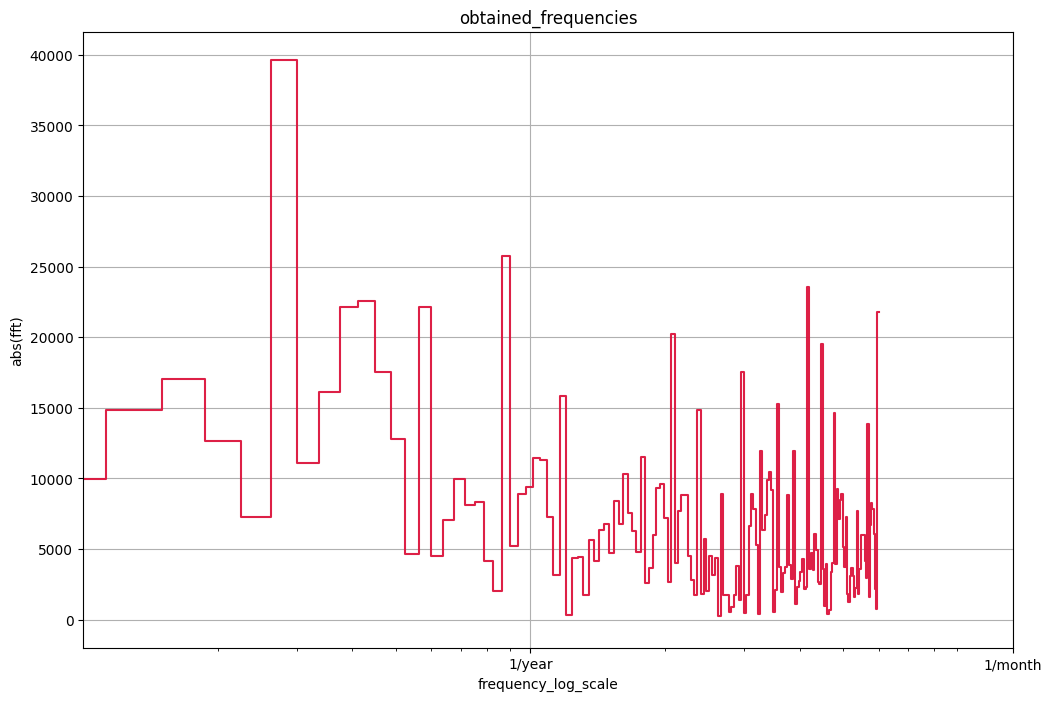



The returned frequencies are always in counts per year: 1 count per year corresponds to 1 year; 12 counts: months per year; 365.2524 counts: days per year, etc.
            
        Plot starts in 0 counts per year; goes from 0.1 to 1 per year (log scale); and grows to 365.2524 = 1 count per day; to the limit defined.
                        
        Thus, to when reading the results, one can simply pick the frequency and use as given, considering that the unit is (year)**-1.
            
        Instead, the following rules can be applied:

        - 1/year = 1 count per year

        - 365.2524/year = 365.2524 counts per year = 1/day = 1 count per day

        - (8766.0576)/year = (24 * 365.2524) counts per year = 24 counts/day = 1/h = 1 count per hour.

        - (525963.4560)/year = (60 * 24 * 365.2524) counts per year = 60*24 counts/day = 60 counts/hour = 1/min = 1 count per minute.

        - (31557807.3600)/year = (60 * 60 * 24 * 365.2524) counts per year = ... =  1/min = 60 c

,freq_in_counts_per_year,abs_fft
0,0.0000,0.000977
1,0.0375,5906.814941
2,0.0750,7268.549316
3,0.1125,9934.991211
4,0.1500,14828.884766
...,...,...
156,5.8500,7854.138184
157,5.8875,6064.175293
158,5.9250,2179.482178
159,5.9625,746.742493


In [16]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'GY'
# 'PH', 'IFP', 'NLP', 'NGL', 'NS', 'MHG', 'GY'
# COLUMN_TO_ANALYZE: string (inside quotes),
# containing the name of the column that will be analyzed.
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'm'
# AVERAGE_FREQUENCY_OF_DATA_COLLECTION = 'hour' or 'h' for hours; 'day' or 'd' for days;
# 'minute' or 'min' for minutes; 'seconds' or 's' for seconds; 'ms' for milliseconds; 'ns' for
# nanoseconds; 'year' or 'y' for years; 'month' or 'm' for months.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'capability_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# The results of the Fast Fourier Transform will be stored in the object named fft.
# fft_with_freq_df is a dataframe containing the absolute ffts
# with the correspondent frequencies in counts per year.
# Simply modify this object on the left of equality:
fft, fft_with_freq_df = fast_fourier_transform (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, average_frequency_of_data_collection = AVERAGE_FREQUENCY_OF_DATA_COLLECTION, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

The peaks above 20000 (intensity) are common to most of the plots. Let's filter them

In [17]:
fft_with_freq_df = fft_with_freq_df[fft_with_freq_df['abs_fft'] >= 20000]
fft_with_freq_df

,freq_in_counts_per_year,abs_fft
8,0.3000,39665.082031
11,0.4125,22140.419922
12,0.4500,22596.007812
16,0.6000,22165.398438
24,0.9000,25747.523438
56,2.1000,20213.755859
112,4.2000,23550.328125
160,6.0000,21809.636719


### **Generating columns with frequency information**
- This gives the model access to the most important frequency features.

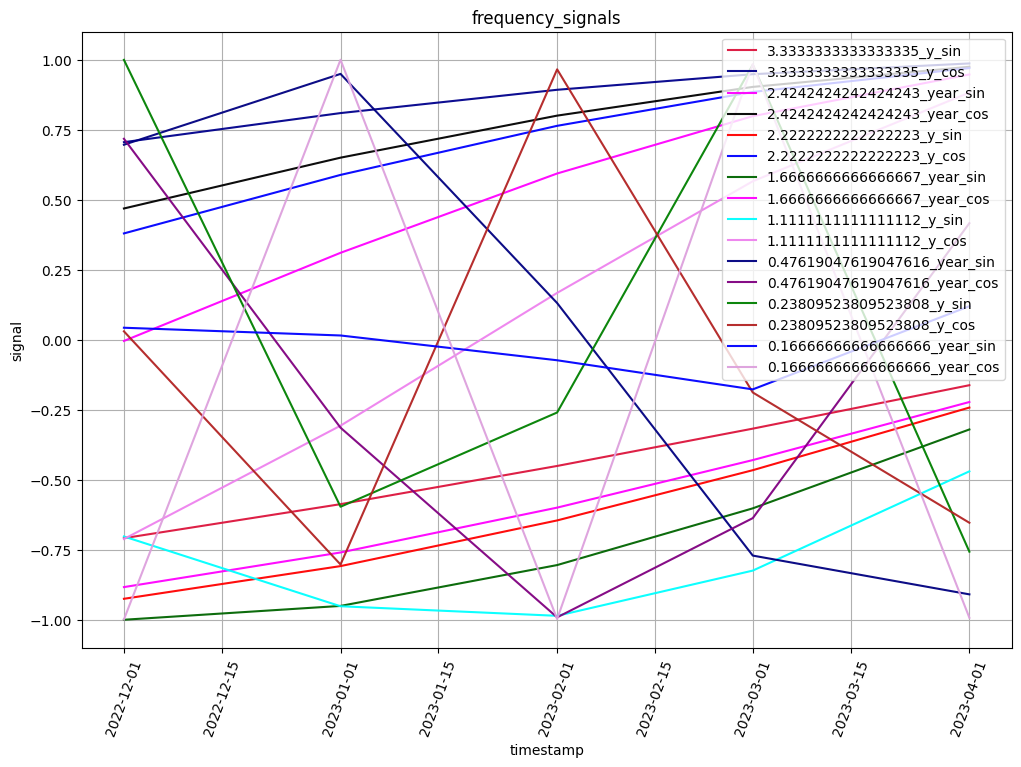

Frequency features retrieved. Check 10 first rows from the new dataframe:



,timestamp,Season,Repetition,Cultivar,PH,IFP,NLP,NGL,NS,MHG,...,1.6666666666666667_year_sin,1.6666666666666667_year_cos,1.1111111111111112_y_sin,1.1111111111111112_y_cos,0.47619047619047616_year_sin,0.47619047619047616_year_cos,0.23809523809523808_y_sin,0.23809523809523808_y_cos,0.16666666666666666_year_sin,0.16666666666666666_year_cos
0,2022-12-01,1,1,NEO 760 CE,58.8,15.2,98.2,1.81,5.2,152.20,...,-0.999991,-0.00429,-0.702542,-0.711642,0.69641,0.717644,0.999549,0.030025,0.042886,-0.99908
1,2022-12-01,1,1,MANU IPRO,81.2,18.0,98.8,1.75,7.4,145.59,...,-0.999991,-0.00429,-0.702542,-0.711642,0.69641,0.717644,0.999549,0.030025,0.042886,-0.99908
2,2022-12-01,1,1,77HO111I2X - GUAPORÉ,52.2,14.4,64.8,2.30,7.2,180.25,...,-0.999991,-0.00429,-0.702542,-0.711642,0.69641,0.717644,0.999549,0.030025,0.042886,-0.99908
3,2022-12-01,1,1,NK 7777 IPRO,54.0,15.4,82.2,2.67,8.2,188.27,...,-0.999991,-0.00429,-0.702542,-0.711642,0.69641,0.717644,0.999549,0.030025,0.042886,-0.99908
4,2022-12-01,1,1,GNS7900 IPRO - AMPLA,55.2,19.8,49.0,1.64,3.6,161.01,...,-0.999991,-0.00429,-0.702542,-0.711642,0.69641,0.717644,0.999549,0.030025,0.042886,-0.99908
5,2022-12-01,1,1,LTT 7901 IPRO,60.6,15.8,61.4,2.22,6.0,164.13,...,-0.999991,-0.00429,-0.702542,-0.711642,0.69641,0.717644,0.999549,0.030025,0.042886,-0.99908
6,2022-12-01,1,1,BRASMAX BÔNUS IPRO,71.2,19.4,73.0,2.05,6.4,177.23,...,-0.999991,-0.00429,-0.702542,-0.711642,0.69641,0.717644,0.999549,0.030025,0.042886,-0.99908
7,2022-12-01,1,1,97Y97 IPRO,53.8,14.0,49.0,2.66,5.2,167.34,...,-0.999991,-0.00429,-0.702542,-0.711642,0.69641,0.717644,0.999549,0.030025,0.042886,-0.99908
8,2022-12-01,1,1,BRASMAX OLIMPO IPRO,86.6,23.0,44.0,2.00,4.8,187.87,...,-0.999991,-0.00429,-0.702542,-0.711642,0.69641,0.717644,0.999549,0.030025,0.042886,-0.99908
9,2022-12-01,1,1,LYNDA IPRO,55.8,13.6,44.4,1.99,2.8,196.27,...,-0.999991,-0.00429,-0.702542,-0.711642,0.69641,0.717644,0.999549,0.030025,0.042886,-0.99908


In [18]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

TIMESTAMP_TAG_COLUMN = "timestamp"
# TIMESTAMP_TAG_COLUMN = None. string containing the name of the column with the timestamp.
# If TIMESTAMP_TAG_COLUMN is None, the index will be used for testing different imputations.
# be the time series reference. declare as a string under quotes. This is the column from
# which we will extract the timestamps or values with temporal information. e.g.
# TIMESTAMP_TAG_COLUMN = 'timestamp' will consider the column 'timestamp' a time column.

IMPORTANT_FREQUENCIES = [{'value': 0.3000, 'unit': 'y'},
                         {'value':0.4125, 'unit': 'year'},
                         {'value': 0.4500, 'unit': 'y'},
                         {'value':0.6000, 'unit': 'year'},
                         {'value':0.9000, 'unit': 'y'},
                         {'value':2.1000, 'unit': 'year'},
                         {'value': 4.2000, 'unit': 'y'},
                         {'value':6.0000, 'unit': 'year'}

                         ]

# IMPORTANT_FREQUENCIES = [{'value': 1, 'unit': 'day'}, {'value':1, 'unit': 'year'}]
# List of dictionaries with the important frequencies to add to the model. You can remove dictionaries,
# or add extra dictionaries. The dictionaries must have always the same keys, 'value' and 'unit'.
# If the importante frequency is once a day, the value will be 1, and the unit will be 'day' or 'd'.
# The possible units are: 'ns', 'ms', 'second' or 's', 'minute' or 'min', 'day' or 'd', 'month' or 'm',
# 'year' or 'y'.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"
MAX_NUMBER_OF_ENTRIES_TO_PLOT = None
# MAX_NUMBER_OF_ENTRIES_TO_PLOT (integer or None): use this argument to limit the number of entries
# to plot. If None, all the entries will be plot.
# MAX_NUMBER_OF_ENTRIES_TO_PLOT = 25 will plot the first 25 entries, MAX_NUMBER_OF_ENTRIES_TO_PLOT =
# 100 will plot the 100 first entries, and so on.

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'capability_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# The dataset with new columns containing the frequency information will be stored as dataset.
# A dictionary with new features information is returned as timestamp_dict
# Simply modify these objects on the left of equality:
dataset, timestamp_dict = get_frequency_features (df = DATASET, timestamp_tag_column = TIMESTAMP_TAG_COLUMN, important_frequencies = IMPORTANT_FREQUENCIES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, max_number_of_entries_to_plot = MAX_NUMBER_OF_ENTRIES_TO_PLOT, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **log-transforming the variables**
- One curve derived from the normal is the log-normal.
- If the values Y follow a log-normal distribution, their log follow a normal.
- A log normal curve resembles a normal, but with skewness (distortion); and kurtosis (long-tail).

Applying the log is a methodology for **normalizing the variables**: the sample space gets shrinkled after the transformation, making the data more adequate for being processed by Machine Learning algorithms.
- Preferentially apply the transformation to the whole dataset, so that all variables will be of same order of magnitude.
- Obviously, it is not necessary for variables ranging from -100 to 100 in numerical value, where most outputs from the log transformation are.

In [19]:
dataset.columns

Index(['timestamp', 'Season', 'Repetition', 'Cultivar', 'PH', 'IFP', 'NLP',
       'NGL', 'NS', 'MHG', 'GY', 'Cultivar_trim', 'Cultivar_homogenized',
       '3.3333333333333335_y_sin', '3.3333333333333335_y_cos',
       '2.4242424242424243_year_sin', '2.4242424242424243_year_cos',
       '2.2222222222222223_y_sin', '2.2222222222222223_y_cos',
       '1.6666666666666667_year_sin', '1.6666666666666667_year_cos',
       '1.1111111111111112_y_sin', '1.1111111111111112_y_cos',
       '0.47619047619047616_year_sin', '0.47619047619047616_year_cos',
       '0.23809523809523808_y_sin', '0.23809523809523808_y_cos',
       '0.16666666666666666_year_sin', '0.16666666666666666_year_cos'],
      dtype='object')

In [28]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

SUBSET = ['PH', 'IFP', 'NLP',
       'NGL', 'NS', 'MHG', 'GY']
# Set SUBSET = None to transform the whole dataset. Alternatively, pass a list with
# columns names for the transformation to be applied. For instance:
# SUBSET = ['col1', 'col2', 'col3'] will apply the transformation to the columns named
# as 'col1', 'col2', and 'col3'. Declare the names inside quotes.
# Declaring the full list of columns is equivalent to setting SUBSET = None.

CREATE_NEW_COLUMNS = True
# Alternatively, set CREATE_NEW_COLUMNS = True to store the transformed data into new
# columns. Or set CREATE_NEW_COLUMNS = False to overwrite the existing columns

ADD_CONSTANT = False
# ADD_CONSTANT = False - If True, the transformation log(x + C) where C is
# a constant will be applied.
CONSTANT_TO_ADD = 0
# CONSTANT_TO_ADD = 0 - float number which will be added to each value that will be transformed.
# Attention: if no constant is added, but there is a negative value, the minimum needed for making
# every value positive will be added automatically. If the constant to add results in negative or
# zero values, it will be also modified to make all values non-negative (condition for applying
# log transform).

NEW_COLUMNS_SUFFIX = "_log"
# This value has effect only if CREATE_NEW_COLUMNS = True.
# The new column name will be set as column + NEW_COLUMNS_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_log", the new column will be named as
# "column1_log".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.

# New dataframe saved as log_transf_df.
# Simply modify this object on the left of equality:
dataset = log_transform (df = DATASET, subset = SUBSET, create_new_columns = CREATE_NEW_COLUMNS, add_constant = ADD_CONSTANT, constant_to_add = CONSTANT_TO_ADD, new_columns_suffix = NEW_COLUMNS_SUFFIX)

# One curve derived from the normal is the log-normal.
# If the values Y follow a log-normal distribution, their log follow a normal.
# A log normal curve resembles a normal, but with skewness (distortion);
# and kurtosis (long-tail).

# Applying the log is a methodology for normalizing the variables:
# the sample space gets shrinkled after the transformation, making the data more
# adequate for being processed by Machine Learning algorithms. Preferentially apply
# the transformation to the whole dataset, so that all variables will be of same order
# of magnitude.
# Obviously, it is not necessary for variables ranging from -100 to 100 in numerical
# value, where most outputs from the log transformation are.

The columns X were successfully log-transformed as log(X + 0.000000). Check the 10 first rows of the new dataset:



,timestamp,Season,Repetition,Cultivar,PH,IFP,NLP,NGL,NS,MHG,...,0.23809523809523808_y_cos,0.16666666666666666_year_sin,0.16666666666666666_year_cos,PH_log,IFP_log,NLP_log,NGL_log,NS_log,MHG_log,GY_log
0,2022-12-01,1,1,NEO 760 CE,58.8,15.2,98.2,1.81,5.2,152.20,...,0.030025,0.042886,-0.99908,4.074142,2.721295,4.587006,0.593327,1.648659,5.025195,8.081110
1,2022-12-01,1,1,MANU IPRO,81.2,18.0,98.8,1.75,7.4,145.59,...,0.030025,0.042886,-0.99908,4.396915,2.890372,4.593098,0.559616,2.001480,4.980794,8.080544
2,2022-12-01,1,1,77HO111I2X - GUAPORÉ,52.2,14.4,64.8,2.30,7.2,180.25,...,0.030025,0.042886,-0.99908,3.955082,2.667228,4.171306,0.832909,1.974081,5.194345,8.199865
3,2022-12-01,1,1,NK 7777 IPRO,54.0,15.4,82.2,2.67,8.2,188.27,...,0.030025,0.042886,-0.99908,3.988984,2.734368,4.409155,0.982078,2.104134,5.237877,8.324278
4,2022-12-01,1,1,GNS7900 IPRO - AMPLA,55.2,19.8,49.0,1.64,3.6,161.01,...,0.030025,0.042886,-0.99908,4.010963,2.985682,3.891820,0.494696,1.280934,5.081466,8.141289
5,2022-12-01,1,1,LTT 7901 IPRO,60.6,15.8,61.4,2.22,6.0,164.13,...,0.030025,0.042886,-0.99908,4.104295,2.760010,4.117410,0.797507,1.791759,5.100659,8.140525
6,2022-12-01,1,1,BRASMAX BÔNUS IPRO,71.2,19.4,73.0,2.05,6.4,177.23,...,0.030025,0.042886,-0.99908,4.265493,2.965273,4.290459,0.717840,1.856298,5.177448,8.162262
7,2022-12-01,1,1,97Y97 IPRO,53.8,14.0,49.0,2.66,5.2,167.34,...,0.030025,0.042886,-0.99908,3.985273,2.639057,3.891820,0.978326,1.648659,5.120028,7.988859
8,2022-12-01,1,1,BRASMAX OLIMPO IPRO,86.6,23.0,44.0,2.00,4.8,187.87,...,0.030025,0.042886,-0.99908,4.461300,3.135494,3.784190,0.693147,1.568616,5.235750,8.382154
9,2022-12-01,1,1,LYNDA IPRO,55.8,13.6,44.4,1.99,2.8,196.27,...,0.030025,0.042886,-0.99908,4.021774,2.610070,3.793239,0.688135,1.029619,5.279491,8.220513


### **One-Hot Encoding the categorical variables**
- Transform categorical values without notion of order into numerical (binary) features.
- For each category, the One-Hot Encoder creates a new column in the dataset. This new column is represented by a binary variable which is equals to zero if the row is not classified in that category; and is equals to 1 when the row represents an element in that category.
- The new columns will be named as the original columns + "_" + possible categories + "OneHotEnc".
- Each column is a binary variable of the type "is classified in this category or not".

Therefore, for a category "A", a column named "A" is created.
- If the row is an element from category "A", the value for the column "A" is 1.
- If not, the value for column "A" is 0.

In [29]:
DATASET = dataset #Alternatively: object containing the dataset to be processed

SUBSET_OF_FEATURES_TO_BE_ENCODED = ['Cultivar']
# SUBSET_OF_FEATURES_TO_BE_ENCODED: list of strings (inside quotes),
# containing the names of the columns with the categorical variables that will be
# encoded. If a single column will be encoded, declare this parameter as list with
# only one element e.g.SUBSET_OF_FEATURES_TO_BE_ENCODED = ["column1"]
# will analyze the column named as 'column1';
# SUBSET_OF_FEATURES_TO_BE_ENCODED = ["col1", 'col2', 'col3'] will analyze 3 columns
# with categorical variables: 'col1', 'col2', and 'col3'.

# New dataframe saved as one_hot_encoded_df; list of encoding information,
# including different categories and encoder objects as OneHot_encoding_list.
# Simply modify this object on the left of equality:
dataset, OneHot_encoding_list = OneHotEncoding_df (df = DATASET, subset_of_features_to_be_encoded = SUBSET_OF_FEATURES_TO_BE_ENCODED)

Successfully encoded column 'Cultivar' and merged the encoded columns to the dataframe.

Check first 5 rows of the encoded table that was merged:



,Cultivar_74K75RSF CE_OneHotEnc,Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc,Cultivar_79I81RSF IPRO_OneHotEnc,Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc,Cultivar_82I78RSF IPRO_OneHotEnc,Cultivar_83IX84RSF I2X_OneHotEnc,Cultivar_96R29 IPRO_OneHotEnc,Cultivar_97Y97 IPRO_OneHotEnc,Cultivar_98R30 CE_OneHotEnc,Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc,...,Cultivar_MONSOY M8606I2X_OneHotEnc,Cultivar_NEO 760 CE_OneHotEnc,Cultivar_NEO 790 IPRO_OneHotEnc,Cultivar_NK 7777 IPRO_OneHotEnc,Cultivar_NK 8100 IPRO_OneHotEnc,Cultivar_NK 8770 IPRO_OneHotEnc,Cultivar_PAULA IPRO_OneHotEnc,Cultivar_SUZY IPRO_OneHotEnc,Cultivar_SYN2282IPRO_OneHotEnc,Cultivar_TMG 22X83I2X_OneHotEnc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




Finished One-Hot Encoding. Returning the new transformed dataframe; and an encoding list.

Each element from this list is a dictionary with the original column name as key 'column', and a nested dictionary as the key 'OneHot_encoder'.

In turns, the nested dictionary shows the different categories as key 'categories' and the encoder object as the key 'OneHot_enc_obj'.

Use the encoder object to inverse the One-Hot Encoding in the correspondent function.

For each category in the columns '['Cultivar']', a new column has value 1, if it is the actual category of that row; or is 0 if not.

Check the first 10 rows of the new dataframe:



,timestamp,Season,Repetition,Cultivar,PH,IFP,NLP,NGL,NS,MHG,...,Cultivar_MONSOY M8606I2X_OneHotEnc,Cultivar_NEO 760 CE_OneHotEnc,Cultivar_NEO 790 IPRO_OneHotEnc,Cultivar_NK 7777 IPRO_OneHotEnc,Cultivar_NK 8100 IPRO_OneHotEnc,Cultivar_NK 8770 IPRO_OneHotEnc,Cultivar_PAULA IPRO_OneHotEnc,Cultivar_SUZY IPRO_OneHotEnc,Cultivar_SYN2282IPRO_OneHotEnc,Cultivar_TMG 22X83I2X_OneHotEnc
0,2022-12-01,1,1,NEO 760 CE,58.8,15.2,98.2,1.81,5.2,152.20,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-12-01,1,1,MANU IPRO,81.2,18.0,98.8,1.75,7.4,145.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-12-01,1,1,77HO111I2X - GUAPORÉ,52.2,14.4,64.8,2.30,7.2,180.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-12-01,1,1,NK 7777 IPRO,54.0,15.4,82.2,2.67,8.2,188.27,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-12-01,1,1,GNS7900 IPRO - AMPLA,55.2,19.8,49.0,1.64,3.6,161.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2022-12-01,1,1,LTT 7901 IPRO,60.6,15.8,61.4,2.22,6.0,164.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2022-12-01,1,1,BRASMAX BÔNUS IPRO,71.2,19.4,73.0,2.05,6.4,177.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2022-12-01,1,1,97Y97 IPRO,53.8,14.0,49.0,2.66,5.2,167.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2022-12-01,1,1,BRASMAX OLIMPO IPRO,86.6,23.0,44.0,2.00,4.8,187.87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2022-12-01,1,1,LYNDA IPRO,55.8,13.6,44.4,1.99,2.8,196.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
OneHot_encoding_list

[{'column': 'Cultivar',
  'OneHot_encoder': {'categories': array(['74K75RSF CE', '77HO111I2X - GUAPORÉ', '79I81RSF IPRO',
          '82HO111 IPRO - HO COXIM IPRO', '82I78RSF IPRO', '83IX84RSF I2X',
          '96R29 IPRO', '97Y97 IPRO', '98R30 CE', 'ADAPTA LTT 8402 IPRO',
          'ATAQUE I2X', 'BRASMAX BÔNUS IPRO', 'BRASMAX OLIMPO IPRO',
          'ELISA IPRO', 'EXPANDE LTT 8301 IPRO', 'FORTALECE L090183 RR',
          'FORTALEZA IPRO', 'FTR 3179 IPRO', 'FTR 3190 IPRO',
          'FTR 3868 IPRO', 'FTR 4280 IPRO', 'FTR 4288 IPRO', 'GNS7700 IPRO',
          'GNS7900 IPRO - AMPLA', 'LAT 1330BT', 'LTT 7901 IPRO',
          'LYNDA IPRO', 'M 8644 IPRO', 'MANU IPRO', 'MONSOY 8330I2X',
          'MONSOY M8606I2X', 'NEO 760 CE', 'NEO 790 IPRO', 'NK 7777 IPRO',
          'NK 8100 IPRO', 'NK 8770 IPRO', 'PAULA IPRO', 'SUZY IPRO',
          'SYN2282IPRO', 'TMG 22X83I2X'], dtype=object),
   'OneHot_enc_obj': OneHotEncoder()}}]

### **Reversing the One-Hot Encoding of the categorical variables**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be processed

ENCODING_LIST = [

    {'column': None,
    'OneHot_encoder': {'OneHot_enc_obj': None, 'encoded_columns': None}},
    {'column': None,
    'OneHot_encoder': {'OneHot_enc_obj': None, 'encoded_columns': None}},
    {'column': None,
    'OneHot_encoder': {'OneHot_enc_obj': None, 'encoded_columns': None}},
    {'column': None,
    'OneHot_encoder': {'OneHot_enc_obj': None, 'encoded_columns': None}}

]
# ENCODING_LIST: list in the same format of the one generated by OneHotEncode_df function:
# it must be a list of dictionaries where each dictionary contains two keys:
# key 'column': string with the original column name (in quotes). If it is None, a column named
# 'category_column_i', where i is the index of the dictionary in the encoding_list will be created;
# key 'OneHot_encoder': this key must store a nested dictionary.
# Even though the nested dictionaries generates by the encoding function present
# two keys:  'categories', storing an array with the different categories;
# and 'OneHot_enc_obj', storing the encoder object, only the key 'OneHot_enc_obj' is required.
## On the other hand, a third key is needed in the nested dictionary:
## key 'encoded_columns': this key must store a list or array with the names of the columns
# obtained from Encoding.

# Alternatively:
"""
    ENCODING_LIST = [{'column': None,
                'OneHot_encoder': [{'category': None,
                                    'encoded_column': column},]}]
"""
# Here, enconding_list will be a list of dictionaries, where each dictionary corresponds to one
# of the new columns to be encoded. The first key ('column') contains the name of the new column
# that will be created. If the value is None, a column named 'category_column_i', where i is the index of
# the dictionary in the encoding_list will be created.
# The second key, 'OneHot_encoder' will store a list of dictionaries. Each dictionary contains one of the
# columns obtained after the One-Hot Encoding, i.e., one of the binary columns that informs if the category
# is present or not. Each dictionary contains two keys: 'category' is the category that is encoded by such column.
# If the value is None, the category will be labeled as 'i' (string), where i is the index of the category in the
# 'OneHot_encoder' list. The 'encoded_column' must contain a string indicating the name (label) of the encoded column
# in the original dataset. For instance, suppose column "label_horse" is a One-Hot Encoded column that stores value 1
# if the label is "horse", and value 0 otherwise.  In this case, 'category': 'horse, 'encoded_column': 'label_horse'.


# New dataframe saved as reversed_one_hot_encoded_df.
# Simply modify this object on the left of equality:
reversed_one_hot_encoded_df = reverse_OneHotEncoding (df = DATASET, encoding_list = ENCODING_LIST)

In [32]:
dataset.columns

Index(['timestamp', 'Season', 'Repetition', 'Cultivar', 'PH', 'IFP', 'NLP',
       'NGL', 'NS', 'MHG', 'GY', 'Cultivar_trim', 'Cultivar_homogenized',
       '3.3333333333333335_y_sin', '3.3333333333333335_y_cos',
       '2.4242424242424243_year_sin', '2.4242424242424243_year_cos',
       '2.2222222222222223_y_sin', '2.2222222222222223_y_cos',
       '1.6666666666666667_year_sin', '1.6666666666666667_year_cos',
       '1.1111111111111112_y_sin', '1.1111111111111112_y_cos',
       '0.47619047619047616_year_sin', '0.47619047619047616_year_cos',
       '0.23809523809523808_y_sin', '0.23809523809523808_y_cos',
       '0.16666666666666666_year_sin', '0.16666666666666666_year_cos',
       'PH_log', 'IFP_log', 'NLP_log', 'NGL_log', 'NS_log', 'MHG_log',
       'GY_log', 'Cultivar_74K75RSF CE_OneHotEnc',
       'Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc',
       'Cultivar_79I81RSF IPRO_OneHotEnc',
       'Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc',
       'Cultivar_82I78RSF IPRO_OneHotEnc', 

In [34]:
dataset = dataset.rename(columns={'3.3333333333333335_y_sin': 'f1_sin', '3.3333333333333335_y_cos':'f1_cos',
       '2.4242424242424243_year_sin':'f2_sin', '2.4242424242424243_year_cos': 'f2_cos',
       '2.2222222222222223_y_sin': 'f3_sin', '2.2222222222222223_y_cos': 'f3_cos',
       '1.6666666666666667_year_sin': 'f4_sin', '1.6666666666666667_year_cos': 'f4_cos',
       '1.1111111111111112_y_sin': 'f5_sin', '1.1111111111111112_y_cos': 'f5_cos',
       '0.47619047619047616_year_sin': 'f6_sin', '0.47619047619047616_year_cos': 'f6_cos',
       '0.23809523809523808_y_sin': 'f7_sin', '0.23809523809523808_y_cos': 'f7_cos',
       '0.16666666666666666_year_sin': 'f8_sin', '0.16666666666666666_year_cos': 'f8_cos'})

In [35]:
dataset = dataset.drop(columns = ['Cultivar', 'PH', 'IFP', 'NLP',
       'NGL', 'NS', 'MHG', 'GY', 'Cultivar_trim', 'Cultivar_homogenized'])

In [36]:
dataset.columns

Index(['timestamp', 'Season', 'Repetition', 'f1_sin', 'f1_cos', 'f2_sin',
       'f2_cos', 'f3_sin', 'f3_cos', 'f4_sin', 'f4_cos', 'f5_sin', 'f5_cos',
       'f6_sin', 'f6_cos', 'f7_sin', 'f7_cos', 'f8_sin', 'f8_cos', 'PH_log',
       'IFP_log', 'NLP_log', 'NGL_log', 'NS_log', 'MHG_log', 'GY_log',
       'Cultivar_74K75RSF CE_OneHotEnc',
       'Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc',
       'Cultivar_79I81RSF IPRO_OneHotEnc',
       'Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc',
       'Cultivar_82I78RSF IPRO_OneHotEnc', 'Cultivar_83IX84RSF I2X_OneHotEnc',
       'Cultivar_96R29 IPRO_OneHotEnc', 'Cultivar_97Y97 IPRO_OneHotEnc',
       'Cultivar_98R30 CE_OneHotEnc',
       'Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc',
       'Cultivar_ATAQUE I2X_OneHotEnc',
       'Cultivar_BRASMAX BÔNUS IPRO_OneHotEnc',
       'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc',
       'Cultivar_ELISA IPRO_OneHotEnc',
       'Cultivar_EXPANDE LTT 8301 IPRO_OneHotEnc',
       'Cultivar_FORTALECE L090183 RR_One

In [37]:
dataset = dataset[['timestamp', 'Season', 'Repetition', 'f1_sin', 'f1_cos', 'f2_sin',
       'f2_cos', 'f3_sin', 'f3_cos', 'f4_sin', 'f4_cos', 'f5_sin', 'f5_cos',
       'f6_sin', 'f6_cos', 'f7_sin', 'f7_cos', 'f8_sin', 'f8_cos',
       'Cultivar_74K75RSF CE_OneHotEnc',
       'Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc',
       'Cultivar_79I81RSF IPRO_OneHotEnc',
       'Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc',
       'Cultivar_82I78RSF IPRO_OneHotEnc', 'Cultivar_83IX84RSF I2X_OneHotEnc',
       'Cultivar_96R29 IPRO_OneHotEnc', 'Cultivar_97Y97 IPRO_OneHotEnc',
       'Cultivar_98R30 CE_OneHotEnc',
       'Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc',
       'Cultivar_ATAQUE I2X_OneHotEnc',
       'Cultivar_BRASMAX BÔNUS IPRO_OneHotEnc',
       'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc',
       'Cultivar_ELISA IPRO_OneHotEnc',
       'Cultivar_EXPANDE LTT 8301 IPRO_OneHotEnc',
       'Cultivar_FORTALECE L090183 RR_OneHotEnc',
       'Cultivar_FORTALEZA IPRO_OneHotEnc', 'Cultivar_FTR 3179 IPRO_OneHotEnc',
       'Cultivar_FTR 3190 IPRO_OneHotEnc', 'Cultivar_FTR 3868 IPRO_OneHotEnc',
       'Cultivar_FTR 4280 IPRO_OneHotEnc', 'Cultivar_FTR 4288 IPRO_OneHotEnc',
       'Cultivar_GNS7700 IPRO_OneHotEnc',
       'Cultivar_GNS7900 IPRO - AMPLA_OneHotEnc',
       'Cultivar_LAT 1330BT_OneHotEnc', 'Cultivar_LTT 7901 IPRO_OneHotEnc',
       'Cultivar_LYNDA IPRO_OneHotEnc', 'Cultivar_M 8644 IPRO_OneHotEnc',
       'Cultivar_MANU IPRO_OneHotEnc', 'Cultivar_MONSOY 8330I2X_OneHotEnc',
       'Cultivar_MONSOY M8606I2X_OneHotEnc', 'Cultivar_NEO 760 CE_OneHotEnc',
       'Cultivar_NEO 790 IPRO_OneHotEnc', 'Cultivar_NK 7777 IPRO_OneHotEnc',
       'Cultivar_NK 8100 IPRO_OneHotEnc', 'Cultivar_NK 8770 IPRO_OneHotEnc',
       'Cultivar_PAULA IPRO_OneHotEnc', 'Cultivar_SUZY IPRO_OneHotEnc',
       'Cultivar_SYN2282IPRO_OneHotEnc', 'Cultivar_TMG 22X83I2X_OneHotEnc',
        'PH_log','IFP_log', 'NLP_log', 'NGL_log', 'NS_log', 'MHG_log', 'GY_log']]

In [38]:
dataset

,timestamp,Season,Repetition,f1_sin,f1_cos,f2_sin,f2_cos,f3_sin,f3_cos,f4_sin,...,Cultivar_SUZY IPRO_OneHotEnc,Cultivar_SYN2282IPRO_OneHotEnc,Cultivar_TMG 22X83I2X_OneHotEnc,PH_log,IFP_log,NLP_log,NGL_log,NS_log,MHG_log,GY_log
0,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,4.074142,2.721295,4.587006,0.593327,1.648659,5.025195,8.081110
1,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,4.396915,2.890372,4.593098,0.559616,2.001480,4.980794,8.080544
2,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,3.955082,2.667228,4.171306,0.832909,1.974081,5.194345,8.199865
3,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,3.988984,2.734368,4.409155,0.982078,2.104134,5.237877,8.324278
4,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,0.0,4.010963,2.985682,3.891820,0.494696,1.280934,5.081466,8.141289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2023-04-01,2,4,-0.162360,0.986732,-0.222364,0.974964,-0.242191,0.970229,-0.320412,...,0.0,0.0,0.0,4.126005,2.379546,3.594569,0.908259,1.098612,5.062152,8.102990
316,2023-04-01,2,4,-0.162360,0.986732,-0.222364,0.974964,-0.242191,0.970229,-0.320412,...,0.0,0.0,0.0,4.240895,2.070653,4.580877,1.115142,1.481605,5.037602,8.278761
317,2023-04-01,2,4,-0.162360,0.986732,-0.222364,0.974964,-0.242191,0.970229,-0.320412,...,0.0,0.0,0.0,4.495355,2.789323,4.261693,0.751416,1.098612,5.080224,8.018688
318,2023-04-01,2,4,-0.162360,0.986732,-0.222364,0.974964,-0.242191,0.970229,-0.320412,...,0.0,0.0,0.0,4.481080,2.793004,4.327174,0.609766,1.300192,4.906681,8.116396


### **Importing or exporting models and dictionaries (or lists)**

#### Case 1: import only a model

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'arima'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Model object saved as model.
# Simply modify this object on the left of equality:
model = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

#### Case 2: import only a dictionary or a list

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'dict_or_list_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'arima'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Dictionary or list saved as imported_dict_or_list.
# Simply modify this object on the left of equality:
imported_dict_or_list = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

#### Case 3: import a model and a dictionary (or a list)

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_and_dict'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'arima'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Model object saved as model. Dictionary or list saved as imported_dict_or_list.
# Simply modify these objects on the left of equality:
model, imported_dict_or_list = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

#### Case 4: export a model and/or a dictionary (or a list)

In [39]:
ACTION = 'export'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'dict_or_list_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = 'OneHot_encoding_list'
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'arima'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = OneHot_encoding_list
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

Dictionary or list successfully exported as OneHot_encoding_list.pkl.
Export of files completed.


## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [40]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = dataset
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset2"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file"
# to export the CSV file 'my_file.csv' to notebook's workspace.

export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe dataset2 exported as CSV file to notebook's workspace as 'dataset2.csv'.


## **Exporting dataframes as Excel file tables**

In [ ]:
## WARNING: all files exported from this function are .xlsx

FILE_NAME_WITHOUT_EXTENSION = "datasets"
# (string, in quotes): input the name of the
# file without the extension. e.g. new_file_name_without_extension = "my_file"
# will export a file 'my_file.xlsx' to notebook's workspace.

EXPORTED_TABLES = [{'dataframe_obj_to_be_exported': None,
                    'excel_sheet_name': None},]

# exported_tables is a list of dictionaries. User may declare several dictionaries,
# as long as the keys are always the same, and if the values stored in keys are not None.

# key 'dataframe_obj_to_be_exported': dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: dataframe_obj_to_be_exported = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

# key 'excel_sheet_name': string containing the name of the sheet to be written on the
# exported Excel file. Example: excel_sheet_name = 'tab_1' will save the dataframe in the
# sheet 'tab_1' from the file named as file_name_without_extension.

# examples: exported_tables = [{'dataframe_obj_to_be_exported': dataset1,
# 'excel_sheet_name': 'sheet1'},]
# will export only dataset1 as 'sheet1';
# exported_tables = [{'dataframe_obj_to_be_exported': dataset1, 'excel_sheet_name': 'sheet1'},
# {'dataframe_obj_to_be_exported': dataset2, 'excel_sheet_name': 'sheet2']
# will export dataset1 as 'sheet1' and dataset2 as 'sheet2'.

# Notice that if the file does not contain the exported sheets, they will be created. If it has,
# the sheets will be replaced.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None


export_pd_dataframe_as_excel (file_name_without_extension = FILE_NAME_WITHOUT_EXTENSION, exported_tables = EXPORTED_TABLES, file_directory_path = FILE_DIRECTORY_PATH)

****

# **One-Hot Encoding - Background**

If there are **categorical features**, they should be converted into numerical variables for being processed by the machine learning algorithms.

\- We can assign integer values for each one of the categories. This works well for situations where there is a scale or order for the assignment of the variables (e.g., if there is a satisfaction grade).

\- On the other hand, the results may be compromised if there is no order. That is because the ML algorithms assume that, if two categories have close numbers, then the categories are similar, what is not necessarily true. There are cases where the categories have no relation with each other.

\- In these cases, the best strategy is the One-Hot Encoding. For each category, the One-Hot Encoder creates a new column in the dataset. This new column is represented by a binary variable which is equals to zero if the row is not classified in that category; and is equals to 1 when the row represents an element in that category.

\- Naturally, the number of columns grow with the number of possible labels. The One-Hot Encoder from Sklearn creates a Scipy Sparse matrix that stores the position of the zeros in the dataset. Then, the computational cost is reduced due to the fact that we are not storing a huge amount of null values.

\- Since each column is a binary variable of the type "is classified in this category or not", we expect that the created columns contain more zeros than 1s. That is because if an element belongs to one category (= 1), it does not belong to the others, so its value is zero for all other columns.